### Importing libraries

In [54]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt 

### Importing data

In [55]:
campaign_desc = pd.read_csv('data/campaign_desc.csv') 
campaign_table = pd.read_csv('data/campaign_table.csv')
causal_data = pd.read_csv('data/causal_data.csv') 
coupon_redempt = pd.read_csv('data/coupon_redempt.csv') 
coupon = pd.read_csv('data/coupon.csv') 
hh_demographic = pd.read_csv('data/hh_demographic.csv') 
product = pd.read_csv('data/product.csv') 
transaction_data = pd.read_csv('data/transaction_data.csv') 

### Analysing data (Table-wise)

As the data is contained in various tables, first we have a look at the what data we have in the individual tables, check for null values and then join certain tables using a common field as the key so that we can make better predictions.

### Campaign Description

In [56]:
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [57]:
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


Basic info about the columns above:
- DESCRIPTION: Type of campaign (TypeA, TypeB or TypeC)
- CAMPAIGN   : Uniquely identifies each campaign. Ranges 1-30
- START_DAY  : Start date of campaign
- END_DAY    : End date of campaign

In [58]:
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [59]:
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


Basic info about the columns above:
- DESCRIPTION: Type of campaign (TypeA, TypeB or TypeC)
- HOUSEHOLD  : Uniquely identifies each household
- CAMPAIGN   : Uniquely identifies each campaign. Ranges 1-30

In [60]:
campaigndata = pd.merge(campaign_desc, campaign_table, how="inner", on=["DESCRIPTION"])

In [61]:
campaigndata.head()

,DESCRIPTION,CAMPAIGN_x,START_DAY,END_DAY,household_key,CAMPAIGN_y
0,TypeB,24,659,719,105,28
1,TypeB,24,659,719,1238,28
2,TypeB,24,659,719,1633,28
3,TypeB,24,659,719,2448,28
4,TypeB,24,659,719,2317,28


In [62]:
campaigndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73784 entries, 0 to 73783
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    73784 non-null  object
 1   CAMPAIGN_x     73784 non-null  int64 
 2   START_DAY      73784 non-null  int64 
 3   END_DAY        73784 non-null  int64 
 4   household_key  73784 non-null  int64 
 5   CAMPAIGN_y     73784 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.9+ MB


### Product and Coupon information

In [63]:
causal_data.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [64]:
causal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


Basic info about the columns above:
- PRODUCT_ID: Uniquely identifies each product
- STORE_ID  : Identifies unique stores
- WEEK_NO   : Week of the transaction
- display   : Display location
- mailer    : Mailer location

In [65]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [66]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


Basic info about the columns above:
- PRODUCT_ID          : Uniquely identifies each product
- MANUFACTURER        : Code that links product with same manufacturer together
- DEPARTMENT          : Groups similar product together
- BRAND               : Indicates Private or National label brand
- COMMODITY_DESC      : Groups similar product together at a lower level
- SUB_COMMODITY_DESC  : Groups similar product together at the lower level
- CURR_SIZE_OF_PRODUCT: Indicates package size (not available for all products)

In [67]:
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [68]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


Basic info about the columns above:
- COUPON_UPC: Uniquely identifies each coupon (unique to household and campaign)
- PRODUCT_ID: Uniquely identifies each product
- CAMPAIGN  : Uniquely identifies each campaign. Ranges 1-30

In [69]:
storeproducts = pd.merge(causal_data,product, how="inner", on=["PRODUCT_ID"])
storeCoupons = pd.merge(storeproducts,coupon, how="inner", on=["PRODUCT_ID"])

In [ ]:
storeproducts.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
1,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
2,26190,289,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
3,26190,292,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26190,293,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


In [ ]:
storeproducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36786524 entries, 0 to 36786523
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PRODUCT_ID            int64 
 1   STORE_ID              int64 
 2   WEEK_NO               int64 
 3   display               object
 4   mailer                object
 5   MANUFACTURER          int64 
 6   DEPARTMENT            object
 7   BRAND                 object
 8   COMMODITY_DESC        object
 9   SUB_COMMODITY_DESC    object
 10  CURR_SIZE_OF_PRODUCT  object
dtypes: int64(4), object(7)
memory usage: 3.3+ GB


In [ ]:
storeCoupons.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089133,13
1,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,51111070150,26
2,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089038,8
3,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089133,13
4,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,51111070150,26


In [ ]:
storeCoupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84456055 entries, 0 to 84456054
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PRODUCT_ID            int64 
 1   STORE_ID              int64 
 2   WEEK_NO               int64 
 3   display               object
 4   mailer                object
 5   MANUFACTURER          int64 
 6   DEPARTMENT            object
 7   BRAND                 object
 8   COMMODITY_DESC        object
 9   SUB_COMMODITY_DESC    object
 10  CURR_SIZE_OF_PRODUCT  object
 11  COUPON_UPC            int64 
 12  CAMPAIGN              int64 
dtypes: int64(6), object(7)
memory usage: 8.8+ GB


### Households and Coupon redemptions

In [ ]:
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [ ]:
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


Basic info about the columns above:
- household_key: Uniquely identifies each household
- DAY          : Day when transaction occurred
- COUPON_UPC   : Uniquely identifies each coupon (unique to household and campaign)
- CAMPAIGN     : Uniquely identifies each campaign

In [ ]:
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [ ]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


Basic info about the columns above:
- AGE_DESC           : Estimated age range
- MARITAL_STATUS_CODE: Marital Status (A - Married, B - Single, U - Unknown)
- INCOME_DESC        : Household income
- HOMEOWNER_DESC     : Homeowner, renter, etc.
- HH_COMP_DESC       : Household composition
- HOUSEHOLD_SIZE_DESC: Size of household up to 5+
- KID_CATEGORY_DESC  : Number of children present up to 3+
- household_key      : Uniquely identifies each household

In [ ]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


Basic info about the columns above:
- household_key      : Uniquely identifies each household
- BASKET_ID          : Uniquely identifies a purchase occasion
- DAY                : Day when transaction occurred
- PRODUCT_ID         : Uniquely identifies each product
- QUANTITY           : Number of the products purchased during the trip
- SALES_VALUE        : Amount of dollars retailer receives from sale
- STORE_ID           : Identifies unique stores
- RETAIL_DISC        : Discount applied due to retailer's loyalty card program
- TRANS_TIME         : Time of day when the transaction. Ranges 1-102
- WEEK_NO            : Week of the transaction. Ranges 1-102
- COUPON_DISC        : Discount applied due to manufacturer coupon
- COUPON_MATCH_DISC  : Discount applied due to retailer's match of manufacturer coupon

In [ ]:
couponRedemptions = pd.merge(coupon_redempt,hh_demographic, how="inner", on=["household_key"])
hhTransactions = pd.merge(couponRedemptions,transaction_data, how="inner", on=["household_key"])

In [ ]:
couponRedemptions.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,1,421,51700010076,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,1,427,54200000033,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
3,1,597,10000085476,18,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
4,1,597,54200029176,18,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown


In [ ]:
couponRedemptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 0 to 1855
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   household_key        1856 non-null   int64 
 1   DAY                  1856 non-null   int64 
 2   COUPON_UPC           1856 non-null   int64 
 3   CAMPAIGN             1856 non-null   int64 
 4   AGE_DESC             1856 non-null   object
 5   MARITAL_STATUS_CODE  1856 non-null   object
 6   INCOME_DESC          1856 non-null   object
 7   HOMEOWNER_DESC       1856 non-null   object
 8   HH_COMP_DESC         1856 non-null   object
 9   HOUSEHOLD_SIZE_DESC  1856 non-null   object
 10  KID_CATEGORY_DESC    1856 non-null   object
dtypes: int64(4), object(7)
memory usage: 174.0+ KB


In [ ]:
hhTransactions.head()

,household_key,DAY_x,COUPON_UPC,CAMPAIGN,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,...,DAY_y,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,...,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0
1,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,...,51,831447,1,2.99,436,0.00,1456,8,0.0,0.0
2,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,...,51,840361,1,1.09,436,-0.30,1456,8,0.0,0.0
3,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,...,51,845307,1,3.71,436,-0.62,1456,8,0.0,0.0
4,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,...,51,852014,1,2.79,436,-1.20,1456,8,0.0,0.0


In [ ]:
hhTransactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884221 entries, 0 to 4884220
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   household_key        int64  
 1   DAY_x                int64  
 2   COUPON_UPC           int64  
 3   CAMPAIGN             int64  
 4   AGE_DESC             object 
 5   MARITAL_STATUS_CODE  object 
 6   INCOME_DESC          object 
 7   HOMEOWNER_DESC       object 
 8   HH_COMP_DESC         object 
 9   HOUSEHOLD_SIZE_DESC  object 
 10  KID_CATEGORY_DESC    object 
 11  BASKET_ID            int64  
 12  DAY_y                int64  
 13  PRODUCT_ID           int64  
 14  QUANTITY             int64  
 15  SALES_VALUE          float64
 16  STORE_ID             int64  
 17  RETAIL_DISC          float64
 18  TRANS_TIME           int64  
 19  WEEK_NO              int64  
 20  COUPON_DISC          float64
 21  COUPON_MATCH_DISC    float64
dtypes: float64(4), int64(11), object(7)
memory usage: 857.1+ MB


- Information on all of the above:
- campaign_desc - Campaign description, when it started , ended and type
- campaign_table - Household related to the campaign
- campaigndata - Inner join merge between the above 2.
- causal_data - Info on products and which store has them
- product - Product information
- coupon - Coupons related to each product
- storeproducts - Inner join merge between causal data and product
- storeCoupons - Inner join merge between storeproducts and coupon
- coupon_redempt - which household has which coupon
- hh_demographic - As the name says, household demographics
- transaction_data - Transaction history of each household
- couponRedemptions - Inner join merge of coupon redemptions and hh data
- hhTransactions - Probably redundant but inner join merge between couponRedemptions and   transaction_data

### Visualizations And Analysis

#### Mean Median and Standard Deviation

In [ ]:
campaigndata[['CAMPAIGN_x','CAMPAIGN_y','START_DAY','END_DAY']].describe()

,CAMPAIGN_x,CAMPAIGN_y,START_DAY,END_DAY
count,73784.000000,73784.000000,73784.000000,73784.000000
mean,16.039656,15.624295,461.972528,503.905020
std,8.731749,7.184172,133.120383,133.012918
min,1.000000,1.000000,224.000000,264.000000
25%,9.000000,9.000000,351.000000,383.000000
50%,17.000000,16.000000,463.000000,495.000000
75%,24.000000,22.000000,587.000000,635.000000
max,30.000000,30.000000,659.000000,719.000000


In [ ]:
hhTransactions[['DAY_x','AGE_DESC','INCOME_DESC','DAY_y','QUANTITY','SALES_VALUE','RETAIL_DISC','TRANS_TIME','COUPON_DISC','COUPON_MATCH_DISC']].describe()

,DAY_x,DAY_y,QUANTITY,SALES_VALUE,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC
count,4.884221e+06,4.884221e+06,4.884221e+06,4.884221e+06,4.884221e+06,4.884221e+06,4.884221e+06,4.884221e+06
mean,5.330780e+02,3.991388e+02,1.595552e+02,3.191183e+00,-5.732102e-01,1.518426e+03,-4.390862e-02,-9.217814e-03
std,1.001481e+02,1.869931e+02,1.500203e+03,4.513034e+00,1.328777e+00,3.690726e+02,3.394542e-01,6.644021e-02
min,2.250000e+02,1.000000e+00,0.000000e+00,0.000000e+00,-1.300200e+02,0.000000e+00,-5.593000e+01,-4.050000e+00
25%,4.750000e+02,2.430000e+02,1.000000e+00,1.290000e+00,-7.100000e-01,1.237000e+03,0.000000e+00,0.000000e+00
50%,5.380000e+02,4.050000e+02,1.000000e+00,2.000000e+00,-1.000000e-01,1.524000e+03,0.000000e+00,0.000000e+00
75%,6.060000e+02,5.610000e+02,1.000000e+00,3.460000e+00,0.000000e+00,1.809000e+03,0.000000e+00,0.000000e+00
max,7.040000e+02,7.110000e+02,8.963800e+04,8.400000e+02,7.900000e-01,2.359000e+03,0.000000e+00,0.000000e+00


#### The different age groups in the dataset

In [ ]:
# Get the unique age_groups in AGE_DSC
age_groups = sorted(list(hhTransactions.AGE_DESC.unique()))
print("The different age_group buckets in the dataset are " + str(age_groups) + ".")

# Create empty list of to store dataframes
age_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in age_groups:
    age_group_spending_dfs.append(hhTransactions[hhTransactions['AGE_DESC'] == group])
    
    
# Group and Name the Transaction Spending DataFrames by Age Group
age_19_24 = age_group_spending_dfs[0]
age_25_34 = age_group_spending_dfs[1]
age_35_44 = age_group_spending_dfs[2]
age_45_54 = age_group_spending_dfs[3]
age_55_64 = age_group_spending_dfs[4]
age_65 = age_group_spending_dfs[5]

The different age_group buckets in the dataset are ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'].


#### The different income groups in the dataset

In [ ]:
#  Get the unique age_groups in INCOME_DESC
income_groups = sorted(list(hhTransactions.INCOME_DESC.unique()))
print("The different income buckets in the dataset are " + str(income_groups) + ".")

# Create empty list of to store dataframes
income_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in income_groups:
    income_group_spending_dfs.append(hhTransactions[hhTransactions['INCOME_DESC'] == group])
    

#  Group and Name the Transaction Spending DataFrames by Income Group
inc_100_124K = income_group_spending_dfs[0]
inc_125_149K = income_group_spending_dfs[1]
inc_15_24K = income_group_spending_dfs[2]
inc_150_174K = income_group_spending_dfs[3]
inc_175_199K = income_group_spending_dfs[4]
inc_200_249K = income_group_spending_dfs[5]
inc_25_34K = income_group_spending_dfs[6]
inc_250K = income_group_spending_dfs[7]
inc_35_49K = income_group_spending_dfs[8]
inc_50_74K = income_group_spending_dfs[9]
inc_75_99K = income_group_spending_dfs[10]
inc_Under_15K = income_group_spending_dfs[11]

The different income buckets in the dataset are ['100-124K', '125-149K', '15-24K', '150-174K', '175-199K', '200-249K', '25-34K', '250K+', '35-49K', '50-74K', '75-99K', 'Under 15K'].


#### Average Transaction Basket Sales Value by Week for Age Group 19-24

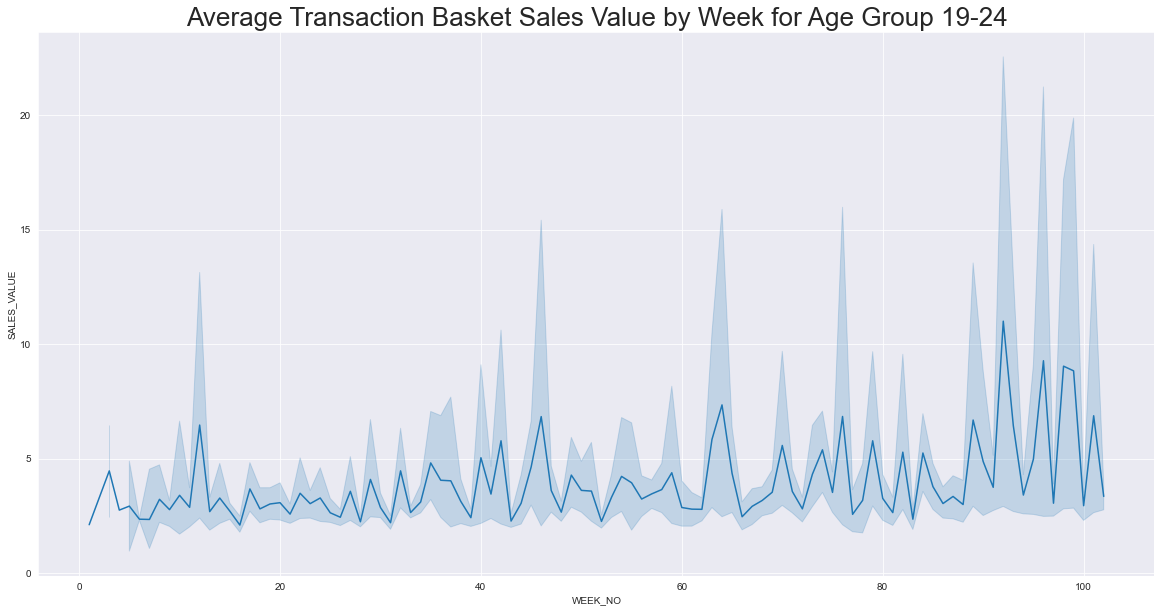

In [ ]:
sns.set_style("darkgrid")

avg_weekly_sales_19_24 = age_19_24[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Age Group 19-24", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_19_24,
                  markers=True)

#### Average Transaction Basket Sales Value by Week for Income Under 15K

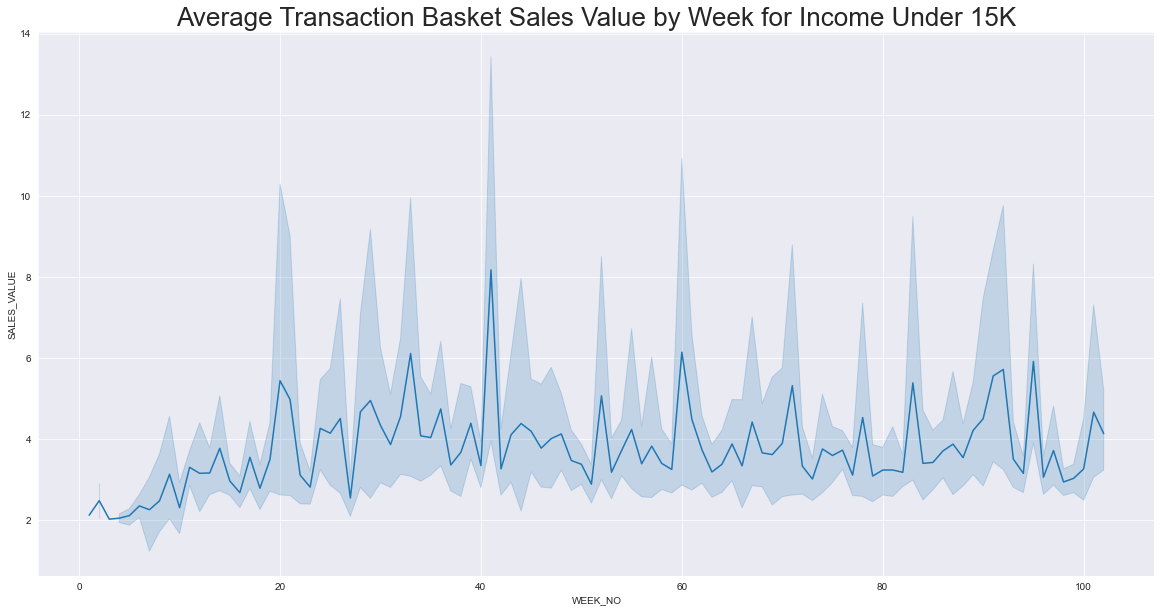

In [ ]:
sns.set_style("darkgrid")

avg_weekly_sales_inc_Under_15K = inc_Under_15K[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Income Under 15K", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_inc_Under_15K,
                  markers=True)

## Box Plot

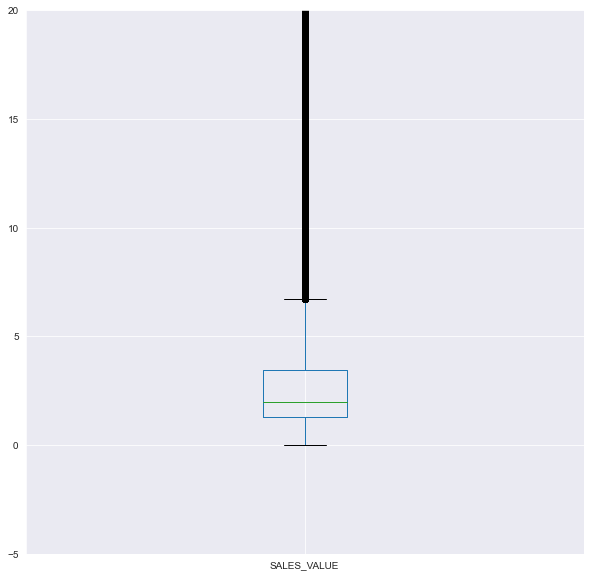

In [ ]:
hhTransactions.boxplot(column = ['SALES_VALUE'], figsize=(10,10))
plt.ylim(-5, 20)
plt.show()

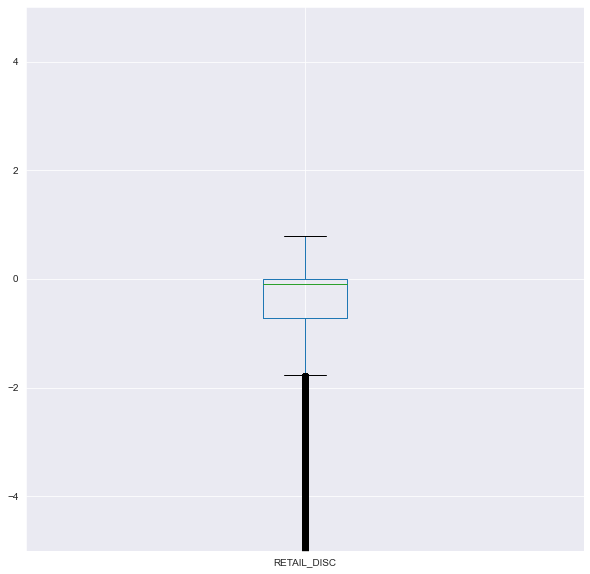

In [ ]:
hhTransactions.boxplot(column =['RETAIL_DISC'], figsize=(10,10))
plt.ylim(-5, 5)
plt.show()

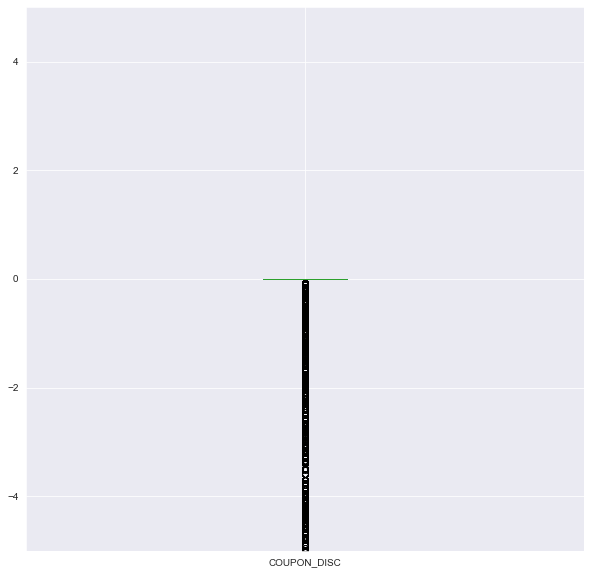

In [ ]:
hhTransactions.boxplot(column =['COUPON_DISC'], figsize=(10,10))
plt.ylim(-5, 5)
plt.show()



In [ ]:
features = ['DAY_x','SALES_VALUE','COUPON_DISC','RETAIL_DISC']

## Pairplot

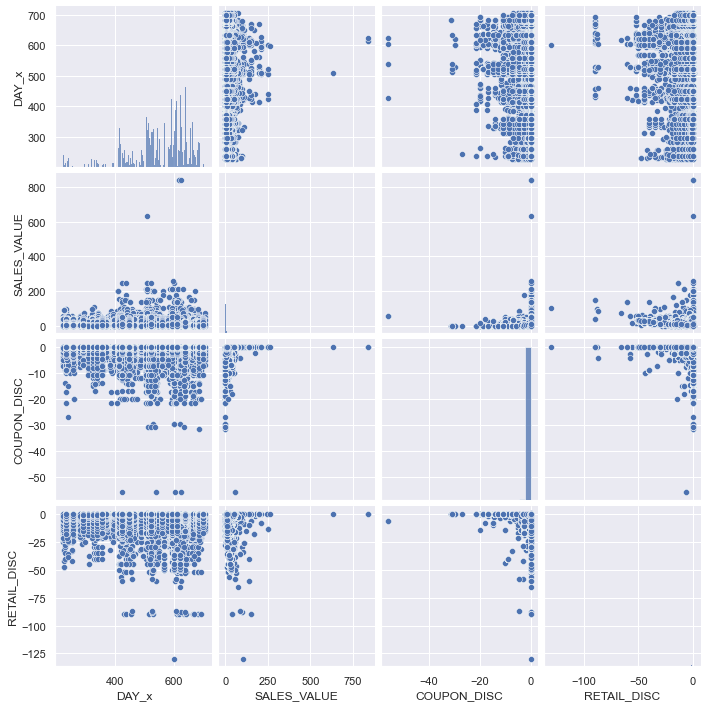

In [ ]:
sns.set()
sns.pairplot(hhTransactions[features])

## Scatterplot


## Calculate the correlation

In [ ]:
from scipy.stats import pearsonr
corr_dayX_sales,_ = pearsonr(hhTransactions['DAY_x'], hhTransactions['SALES_VALUE'])
print('Pearsons correlation: %.3f' % corr_dayX_sales)

Pearsons correlation: 0.018


In [ ]:
corr_dayX_coupon,_ = pearsonr(hhTransactions['DAY_x'], hhTransactions['COUPON_DISC'])
print('Pearsons correlation: %.3f' % corr_dayX_coupon)

Pearsons correlation: -0.002


In [ ]:
corr_dayX_retail,_ = pearsonr(hhTransactions['DAY_x'], hhTransactions['RETAIL_DISC'])
print('Pearsons correlation: %.3f' % corr_dayX_retail)

Pearsons correlation: -0.000


In [ ]:
corr_sales_coupon,_ = pearsonr(hhTransactions['SALES_VALUE'], hhTransactions['COUPON_DISC'])
print('Pearsons correlation: %.3f' % corr_sales_coupon)

Pearsons correlation: -0.017


In [ ]:
corr_sales_retail,_ = pearsonr(hhTransactions['SALES_VALUE'], hhTransactions['RETAIL_DISC'])
print('Pearsons correlation: %.3f' % corr_sales_retail)

Pearsons correlation: -0.249


In [ ]:
corr_retail_coupon,_ = pearsonr(hhTransactions['RETAIL_DISC'], hhTransactions['COUPON_DISC'])
print('Pearsons correlation: %.3f' % corr_retail_coupon)

Pearsons correlation: 0.035
